In [1]:
import numpy as np
import xarray as xr
import extremespaper as ex
import viz
import mplRC
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cftime
import datetime as dt
import os
import glob
import matplotlib.cm as mcm
import warnings
import dask.array as da
mplRC.paperRC2()

warnings.filterwarnings(action='ignore',message='Mean of empty slice',category=RuntimeWarning)
warnings.filterwarnings(action='ignore',message='invalid value encountered in scalar divide',
                        category=RuntimeWarning)

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy39dc/lib/python3.9/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
ff={} # 'ESM4_ssp119_D1','ESM4_ssp585_D1',
for ivar in ['tos','hplusos','spco2','omega_arag_0']:#,'omega_arag_0','omega_arag_50','o2_mean_100_600','o2_50']:#]:#'hplus_50']:#,'hplusos','thetao_50','phos','phos']:#,'o2_mean_100_600''omega_arag_0','omega_arag_50','o2_mean_100_600','o2_50',]:
    exdir=ex.exdirs[ivar]
    print(ivar,exdir)
    for iscen in ['ESM4_ssp126_D1','ESM4_ssp245_D1',#'ESM4_ssp245_D151','ESM4_ssp245_D201','ESM4_ssp534-over_D1',
                  'ESM4_ssp370_D1',#'ESM4_piControl_D',
                 'ESM4_historical_D1',#'ESM4_historical_D151','ESM4_historical_D201','ESM4_1pctCO2_D1_start','ESM4_1pctCO2-cdr_D1_end'
                 'ESM4_ssp119_D1','ESM4_ssp585_D1']:
            #print('   ',iscen)
            try:
                ff[(ivar,iscen)]=ex.openAME(iscen,ivar,exdir)
            except:
                print(iscen,ivar,exdir)
                raise

tos 1
hplusos 1
spco2 1
omega_arag_0 -1


In [3]:
hist='ESM4_historical_D1'
#hist151='ESM4_historical_D151'
#hist201='ESM4_historical_D201'
s126='ESM4_ssp126_D1'
s370='ESM4_ssp370_D1'
s119='ESM4_ssp119_D1'
s585='ESM4_ssp585_D1'
#s534='ESM4_ssp534-over_D1'
s2D1='ESM4_ssp245_D1'
#s2D151='ESM4_ssp245_D151'
#s2D201='ESM4_ssp245_D201'

In [4]:
ylabel={'tos':'SST (°C)',
        'hplusos':'Surface H$^+$ (nM)',
        'omega_arag_0':'Surface $\Omega _{a}$',
        'spco2':'Surface $p$CO$_2$ (µatm)'}

In [5]:
wgt=xr.DataArray(data=viz.areacello1x1,
            coords={'lat': ff[('tos',hist)].lat,'lon': ff[('tos',hist)].lon}, 
            dims=["lat", "lon"]).stack(xy=['lat','lon'])
wgt

<xarray.DataArray (xy: 64800)> Size: 259kB
array([          nan,           nan,           nan, ..., 1.0671161e+08,
       1.0681889e+08, 1.0693562e+08], dtype=float32)
Coordinates:
  * xy       (xy) object 518kB MultiIndex
  * lat      (xy) float64 518kB -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
  * lon      (xy) float64 518kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

In [6]:
def plotAME(ax,ivar):
    a2=.3
    mfac=1e3 if ivar=='hplusos' else 1

    #fig,ax=plt.subplots(1,1,figsize=(8,2))
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s119)][ivar].sel(year=slice(2014,2101)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),'--',
            color='purple',label='SSP1-1.9')
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s126)][ivar].sel(year=slice(2014,2101)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
            color='b',label='SSP1-2.6')
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s2D1)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
            color='teal',label='SSP2-4.5')
    # ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
    #         mfac*ff[(ivar,s2D151)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='teal',label='SSP2-4.5 D151',alpha=a2)
    # ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
    #         mfac*ff[(ivar,s2D201)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='teal',label='SSP2-4.5 D201',alpha=a2)
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s370)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
            color='darkorange',label='SSP3-7.0')
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s585)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),'--',
            color='maroon',label='SSP5-8.5')
    # ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
    #         mfac*ff[(ivar,s534)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='gold',label='SSP5-3.4-overshoot')
    ax.plot(ff[(ivar,hist)]['year'].sel(year=slice(1875,2014)),
            mfac*ff[(ivar,hist)][ivar].sel(year=slice(1875,2014)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
            color='k',label='historical')
    # ax.plot(ff[(ivar,hist)]['year'].sel(year=slice(1875,2014)),
    #         mfac*ff[(ivar,hist151)][ivar].sel(year=slice(1875,2014)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='k',label='historical D151',alpha=a2)
    # ax.plot(ff[(ivar,hist)]['year'].sel(year=slice(1875,2014)),
    #         mfac*ff[(ivar,hist201)][ivar].sel(year=slice(1875,2014)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='k',label='historical D201',alpha=a2)
    ax.set_xlim(1875,2100)
#     if legend: ax.legend(loc=1,bbox_to_anchor=[1.35,1.2])
    ax.axvspan(1975,2014,color='k',alpha=.1)
    ax.axvspan(2061,2100,color='k',alpha=.1)
    ax.set_ylabel(ylabel[ivar])
    if ex.exdirs[ivar]==1:
        ax.set_title('Global Mean of Annual Maximum Monthly Mean',fontsize=10)
    else:
        ax.set_title('Global Mean of Annual Minimum Monthly Mean',fontsize=10)
    return 

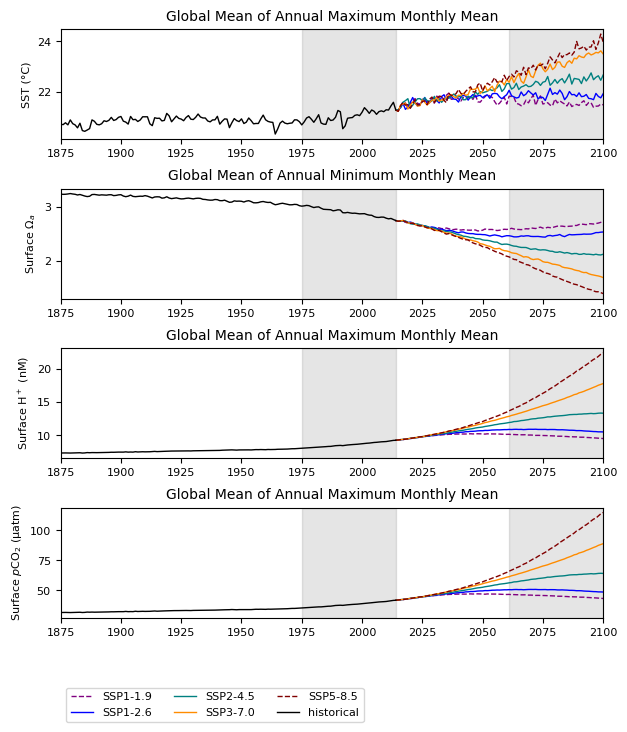

In [7]:
fig,ax=plt.subplots(5,1,figsize=(7,9),gridspec_kw={'height_ratios':[1,1,1,1,.5],'hspace':.5})
plotAME(ax[0],'tos')
plotAME(ax[1],'omega_arag_0')
plotAME(ax[2],'hplusos')
plotAME(ax[3],'spco2')
ax[4].remove()
ax[3].legend(loc="lower left", ncol=3,bbox_to_anchor=[0,-1])
# fig.savefig(f'/home/Elise.Olson/OAPMSE/extremesFigs/MMMm_All.png',
#             dpi=300,bbox_inches='tight')

In [40]:
def plotAME(ax,ivar):
    a2=.3
    if ivar=='hplusos':
        mfac=1e3
    elif ivar=='spco2':
        mfac=1e6/101325
    else:
        mfac=1
    #mfac=1e3 if ivar=='hplusos' else 1

    #fig,ax=plt.subplots(1,1,figsize=(8,2))
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s119)][ivar].sel(year=slice(2014,2101)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),alpha=.5,
            color='purple',label='SSP1-1.9',lw=.5,)
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s126)][ivar].sel(year=slice(2014,2101)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
            color='b',label='SSP1-2.6',lw=1)
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s2D1)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),alpha=.5,
            color='teal',label='SSP2-4.5',lw=.5)
    # ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
    #         mfac*ff[(ivar,s2D151)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='teal',label='SSP2-4.5 D151',alpha=a2,lw=1)
    # ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
    #         mfac*ff[(ivar,s2D201)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='teal',label='SSP2-4.5 D201',alpha=a2,lw=1)
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s370)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
            color='orangered',label='SSP3-7.0',lw=1)
    ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
            mfac*ff[(ivar,s585)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),alpha=.5,
            color='firebrick',label='SSP5-8.5',lw=.5,)
    # ax.plot(ff[(ivar,s126)]['year'].sel(year=slice(2014,2100)),
    #         mfac*ff[(ivar,s534)][ivar].sel(year=slice(2014,2100)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='gold',label='SSP5-3.4-overshoot',lw=1)
    ax.plot(ff[(ivar,hist)]['year'].sel(year=slice(1875,2014)),
            mfac*ff[(ivar,hist)][ivar].sel(year=slice(1875,2014)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
            color='k',label='historical',lw=1)
    # ax.plot(ff[(ivar,hist)]['year'].sel(year=slice(1875,2014)),
    #         mfac*ff[(ivar,hist151)][ivar].sel(year=slice(1875,2014)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='k',label='historical D151',alpha=a2,lw=1)
    # ax.plot(ff[(ivar,hist)]['year'].sel(year=slice(1875,2014)),
    #         mfac*ff[(ivar,hist201)][ivar].sel(year=slice(1875,2014)).stack(xy=['lat','lon']).weighted(wgt.fillna(0)).mean(dim='xy'),
    #         color='k',label='historical D201',alpha=a2,lw=1)
    ax.set_xlim(1875,2100)
#     if legend: ax.legend(loc=1,bbox_to_anchor=[1.35,1.2])
    ax.axvspan(1975,2014,color='k',alpha=.1)
    ax.axvspan(2061,2100,color='k',alpha=.1)
    ax.set_ylabel(ylabel[ivar],labelpad=1)
    if ex.exdirs[ivar]==1:
        ax.set_title('Global Mean AMM$_{max}$',fontsize=10)
    else:
        ax.set_title('Global Mean AMM$_{min}$',fontsize=10)
    return 

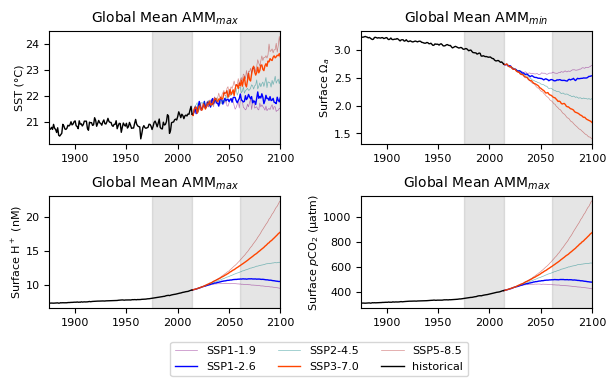

In [41]:
fig,ax=plt.subplots(3,2,figsize=(7,5),gridspec_kw={'height_ratios':[1,1,.5],'hspace':.55,'wspace':.35})
ax=ax.flatten()
plotAME(ax[0],'tos')
plotAME(ax[1],'omega_arag_0')
plotAME(ax[2],'hplusos')
plotAME(ax[3],'spco2')
ax[4].remove();ax[5].remove()
ax[2].legend(loc="lower left", ncol=3,bbox_to_anchor=[0.5,-.65])
fig.savefig('MMMm_All_small.png',dpi=300,bbox_inches='tight')